# Computer Vision Industry Recommendation 

In [1]:
import pandas as pd
import numpy as np
import sqlite3 
from pandasql import sqldf
from scipy import stats
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Plot Parameters

title_font = {'fontname':'Calibri', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
label_font = {'fontname':'Calibri', 'size':'16', 'weight':'normal'}

## Overview

Computer Vision is interested in entering the film industry for the first time. Movie data was analyzed from multiple databases in order to understand the most profitable and successful movies. This data was analyzed utilizing various statistical methods and data manipulation.

## Business Understanding

Computer Vision is looking to produce original video content with the creation of a new movie studio. Their goal is to strategically release top-rated, and high grossing films, but lack of industry specific knowledge and experience is delaying this expansion. An uncalculated debut into the film industry may lead to poor brand recognition or unnecessary financial loss.

By leveraging box office data sources to draw conclusions on variables like release month, genre, audience ratings, and profits our team seeks to answer the how, what, and when so Computer Vision can successfully begin creating films tailored to surpass their goals 

## Data Understanding and Analysis

**Data Sources**
- Box Office Mojo
- IMDB
- Rotten Tomatoes

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  - Movie Information 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  - Movie Reviews

- The Movie DB
- The Numbers

#### Box Office Mojo 

In [3]:
bom_df = pd.read_csv('data/bom.movie_gross.csv')
bom_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


From Box Office Mojo, 3387 records of films during the years 2010-2018, studio name, and their corresponding domestic and foreign gross box-office revenue are given.The Box Office Mojo data type accuratley described the string data as object. However, foreign gross total was listed as "object" and domestic gross was listed as a float even though no decimal value was indicated. Cleaning the dataset included changing the data type of foreign and domestic gross to integer. There were less than 40 NaNs between the studio, and domestic gross columns so dropping these rows was applicable. Alternatively, with over 1,300 NaN values under foreign gross column, the missing data was too significant to draw conclusions and limited analysis. The team concurred that replacing such NaNs with the related mean or another significant value would disproportionaly skew the data. As a result, the team utilized the .describe and .info methods to return the following descriptive statistics for only domestic gross:

**Domestic Gross:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Mean:** $28,745,845.07

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q1:**   $120,000.00

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q3:**   $27,900,000.00

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Standard Deviation:**   $66,982,498.24


Without knowing expenses incurred during production, both domestic and foreign gross revenues cannot be interpreted to the necessary extent. Although, neither release year nor movie title were relevant, an option to compare title to foreign or domestic gross could provide slight insight into title success.

Although the Box Office Mojo provides intriguing data, analyzing the irrelevant and missing data values limits its ability to provide actionable next steps for Computer Vision. Therefore, the team did not use the Box Office Mojo dataset for analyses.

#### IMDB

In [4]:
""" Loading in SQL database """
pysqldf = lambda q: sqldf(q, globals())
conn = sqlite3.connect("data/im.db")

""" Combining the 'Movie Ratings' table and 'Movie Basics' table to analyze variables """
imdb_df = pd.read_sql("""SELECT * FROM movie_basics
                    JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
                    ORDER BY start_year DESC""" , conn)

imdb_df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
1,tt0263814,On kadin,On kadin,2019,NaN,Drama,tt0263814,7.1,100
2,tt0285423,Abolição,Abolição,2019,NaN,Documentary,tt0285423,7.4,35


Provides in depth information on various movies from the year 2010 to 2019. The most relevant of the information provided includes movie ratings, number of ratings for a given movie, genre, and year published


#### Rotten Tomatoes

In [5]:
rt_r_df = pd.read_csv('data/rt.reviews.tsv', sep = '\t', encoding = 'latin1')
rt_r_df.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [6]:
rt_info_df = pd.read_csv('data/rt.movie_info.tsv', sep = '\t', encoding = 'latin1')
rt_info_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


Rotten Tomatoes was the source for both the movie_info and reviews dataset.

**Rotten Tomatoes' movie information** dataset contained a total of 1,560 entries. The 12 column headers provided data for each films': synopsis, rating, genre, director, writer, release date, dvd date, box office revenue, run time, and studio. Every column had NaN values, excluding id. The most significant NaN columns were currency, box office, and studio, each with less than 350 records. This means we are missing 78% of the data for each of these columns. Film ratings ranged from NC17 to G and .dropna was used to remove NaN values since only 3 occurred. The currency value was either USD ($) or NaN. Without data on the release location of each film, the team was unable to substitute the missing currencies. Similarly, with such a deficit of data points for box office revenue amounts, filling in mean or similar profit values would disrupt the accuracy of the dataset significantly. Whether box office revenue is foreign, domestic or a combination of both is also unknown. Genre was analyzed within a separate dataset, and therefore remained untouched. Theater date and dvd date were converted using Python's datetime module. 

**Run Time:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Mean:** 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q1:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q3:** 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Standard Deviation:** 

Given the large number of limitations of the dataset, and missing film titles the team did not analyze this data to provide recommendations. Although with further comparison of other tables, examining genre, synopsis, and revenue could provide Computer Vision with data on successful storylines, and characters.

**Rotten Tomatoes' movie reviews** dataset contained 54,432 entries with 8 columns listed as: id, review, rating, fresh, critic, top critic, publisher and date. The majority of the dataset contained details on the sentiment data of film reviews. The types of rating per review varied greatly. There were some on a 0-5 scale, some 0-10, and others used a grade scale, for example: B-, C, F. Some ratings included floating numbers as well, such as 2.5/5. In addition, the ratings column had the most NaN values, 13,517. The missing and inconsistent rating data was one of the largest limitations within this dataset along with lack of film titles associated with each rating. The team did utilize .strip to remove unnecessary white spaces and punctuation from each review. Following Python's boolean type expressions, it is assumed that a top critic value of 0 indicates False, and a value of 1 indicates True. Although, this does not provide deeper insight of the review or add value to Computer Vision's current business problem. As before, review data was adapted using Python's datetime module. 

With much of the data being subjective based, and limited background on the fresh and rating methodology, the team did not use this dataset as a basis for recommendations. Descriptive statistics are not listed, as a majority of the data is qualitative versus quantitative. In the future, more complex sentiment analysis of critic reviews and an established rating scale may be used to compare film success or profitability. 


#### The Movie DB

In [7]:
tmdb_df = pd.read_csv('data/tmdb.movies.csv', index_col = 0)
tmdb_df.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


The movie database contained a total of 26,517 entries with 9 columns. The columns provided were: genre id, id, original language, original title, popularity, release date, title, vote average, and vote count. The dataset was complete, with no NaN values. The genre ids were given by number, for example: [12,14,10751] which is assumed to relate a specific genre. However, the key for genre id was not listed to a corresponding genre type. As usual, release date was converted to Python's datetime format to more easily filter through data values. Original title versus title is due to language translation such as es, or ja. The popularity values ranged from a minimum of .6 and a maximum of 80.77 however, the mean was 3.13. This indicates outliers within the popularity column. The team was limited in their interpretation of popularity data because there was no associated scale showing how this value was computed. This value was not used in the final recommendation analysis. The film titles were included which provides greater opportunity for analysis when joining with other databases. 
The data types for both vote average and vote count were accurately labeled as float and int. The voting scale ranges from 0 to 10 based on a .describe return showing a min of 0.00 and max of 10.00. Vote count was also disproportionally skewed with outliers, as the mean was 194 and the max returned 22,186 votes. The team did not use this dataset as a basis for recommendations. 

Below are descriptive statistics of relevant data values: 


**Vote Average:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Mean:** 5.99

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q1:** 5.00

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q3:** 3.69

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Standard Deviation:** 1.85


**Vote Count:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Mean:** 194.22

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q1:** 2.00

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Q3:** 28.00

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Standard Deviation:** 960.96

#### The Numbers DB

In [8]:
tn_df = pd.read_csv('data/tn.movie_budgets.csv')
tn_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


This provides a list a movies and their corresponding production budget, domestic gross income, and worldwide gross income 
Description of data
Three visualizations (the same visualizations presented in the slides and notebook)

## Data Preparation and Methodology

After we have an understanding about the shape and variables for each dataset, we can now begin to preprocess and filter the data into the appropriate form for further analysis. We followed the methodologies below:

1. Apply appropriate filters to the SQL Dataset
2. Handling NaN values
3. Checking duplicate rows
4. Transforming specific columns
5. Merging DataFrames
6. Feature engineering


### 1. Applying appropriate filters for SQL dataset

Within the IMDB data, we observed that certain movies only had one rating. Descriptive statistics showed that at least 75% of the movies have at least 14 ratings. We want to preserve as much data as possible while excluding outliers. Therefore we chose the lower quartile as the minimum number of ratings neccesary to be included. This allows us to keep maximum data without our average ratings because skewed up or down by movings that have one review. Additionally, the dataset has information regarding movies past the current year of 2023. In turn we want to exclude any movies released (start_year) beyond 2023. Additional filters are applied to address the null values, which will be discussed next. 

In [9]:
""" Creating the combined data set with the parameters set above """
cleaning_query = """
        SELECT *
        FROM movie_ratings mr
        JOIN movie_basics mb
            ON mr.movie_id = mb.movie_id
        WHERE mr.numvotes >=14 AND mb.genres is not null AND mr.averagerating is not null
        ORDER BY mb.start_year DESC"""

cleaned_sqldata = pd.read_sql(cleaning_query, conn)
cleaned_sqldata

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1673732,8.0,20,tt1673732,Break Clause,Break Clause,2019,NaN,"Drama,Thriller"
3,tt10243678,6.5,1394,tt10243678,Chopsticks,Chopsticks,2019,100.0,"Comedy,Drama"
4,tt10254986,7.0,15,tt10254986,Q Ball,Q Ball,2019,96.0,Documentary
...,...,...,...,...,...,...,...,...,...
55515,tt2344840,6.6,37,tt2344840,H2-Oh!,Narm Pee Nong Sayong Kwan,2010,NaN,"Comedy,Horror"
55516,tt2349630,3.7,165,tt2349630,Whatever God Wants,Whatever God Wants,2010,100.0,"Comedy,Family"
55517,tt2365937,7.2,87,tt2365937,Re-encounter,"Hye-hwa, dong",2010,108.0,Drama
55518,tt2575400,7.1,15,tt2575400,"Cinémas d'Horreur - Apocalypse, Virus, Zombies","Cinémas d'Horreur - Apocalypse, Virus, Zombies",2010,55.0,Documentary


### 2. Handling NaN values

For null values, we need to decide what to do with them as they prevent further analysis. For variables containing null values, we need to decide if it is appropriate to drop the missing data, or fill with a relevant value such as the mean or median. For the SQL data, we saw that after filtering for more than 14 ratings, there was only ~600 (<2%) of empty values for the averagerating and genres features, therefore we decided to drop them since very little data are lost. For the other datasets, we looked at the proportion of nulls to the number of records in entire dataframe (for each variable).

In [10]:
def proportion_na(df):
    return df.isna().sum()/len(df) * 100

# Check NA
proportion_na(tn_df)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [11]:
proportion_na(rt_info_df)

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

The Movie DB and The Numbers dataset are entirely free of empty values, which makes it very convenient to work with. The Rotten Tomatoes datasets contain a lot of nulls, and since they only contain individual reviews, we decided to not filter them as they don't contain variables we're interested in. 

### 3. Handling duplicate rows

Next, it is important to check for duplicate within the datasets, as they can distort the features and lead to inaccurate analysis. For Box Office Mojo, The Movie DB and The Numbers data, we do not have duplicate rows. The Movie DB has 1020 duplicate rows, and we looked into some of the duplicated records to see if we can drop them.

In [12]:
print(len(bom_df[bom_df.duplicated()]), len(tn_df[tn_df.duplicated()]), len(cleaned_sqldata[cleaned_sqldata.duplicated()]))

0 0 0


In [13]:
len(tmdb_df[tmdb_df.duplicated()])

1020

In [14]:
# Look into movies with duplicate IDs

tmdb_df[tmdb_df['id'] == 862]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174


In [15]:
tmdb_df[tmdb_df['id'] == 292086]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
5838,"[18, 53]",292086,en,Come Morning,3.013,2012-10-21,Come Morning,6.3,5
11836,"[18, 53]",292086,en,Come Morning,3.013,2012-10-21,Come Morning,6.3,5
21565,"[18, 53]",292086,en,Come Morning,3.013,2012-10-21,Come Morning,6.3,5


In [16]:
tmdb_df.drop_duplicates(subset = 'id', inplace = True)

It appears that they are the same movies, with the exact same values for all features. Therefore we decided that it is safe to drop these duplicates.

### 4. Transforming specific columns

Currently the genre column for IMDB invovles multiple genres for each movie. Therefore we want to seperate these genres to view them indvidually. This will help us to look at genres on their own and be able to recommend the movie genres Computer Vision should focus on. 

We also need to reformat and clean the production_budget, domestic gross and worldwide_gross columns for The Numbers dataset, as they contain special characters such as $ and commas. 

Additionally, we would like to analyze if there are certain months of the year that will be best for releasing new movies. Thus, we trasformed the release dates to DateTime objects and extracted the months. Here we saw four movies that have a release date before year 2000; we filtered those out to focus on the records after 2000.

In [17]:
""" Splitting the rows into individual genres with all the data """

# Making the genres into strings so it can be split

cleaned_sqldata['genres'] = cleaned_sqldata['genres'].astype(str)

# Splitting the genres 
cleaned_sqldata["genres"] = cleaned_sqldata["genres"].str.split(",")
cleaned_sqldata = cleaned_sqldata.apply(pd.Series.explode)
cleaned_sqldata.head(5)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1673732,8.0,20,tt1673732,Break Clause,Break Clause,2019,NaN,Drama
2,tt1673732,8.0,20,tt1673732,Break Clause,Break Clause,2019,NaN,Thriller
3,tt10243678,6.5,1394,tt10243678,Chopsticks,Chopsticks,2019,100.0,Comedy


In [18]:
""" Clean the production budget, domestic gross and worldwide gross columns """

# Remove $ and ,

tn_df['production_budget'] = tn_df['production_budget'].map(lambda x: int(x.strip('$').replace(',', '')))
tn_df['domestic_gross'] = tn_df['domestic_gross'].map(lambda x: int(x.strip('$').replace(',', '')))
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].map(lambda x: int(x.strip('$').replace(',', '')))

In [19]:
""" Use DateTime to extract months """

tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['year'] = tn_df['release_date'].dt.year
tn_df = tn_df[tn_df['year'] > 2000]

tn_df['month'] = tn_df['release_date'].dt.month

### 5. Feature Engineering

We created a variable named profitability to capture the profit generated for movies as a multiplier of production budget. We will use the feature engineered column to measure profitability across the months.

$$ \textrm{Profitability} =\frac{\textrm{Worldwide Gross}}{\textrm{Production Budget}}$$ 

In [20]:
# Profitability Multiplier

tn_df['profitability'] = tn_df['worldwide_gross']/tn_df['production_budget']
tn_df.sort_values(by = 'profitability', ascending = False)[:3]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profitability
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,2009,9,431.517853
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,2015,7,416.564740
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,2004,5,342.058585


### 6. Merging DataFrames

Lastly, we want to combine the IMDB data which contains the genres of movies with The Numbers data, which contains the production budget and gross variables. We merge these to create a common DataFrame in order to analyze the effect of genres on profit (profitability). Again, we expand those movies with multiple genres on a single row.

In [21]:
# Merge IMDB and The Numbers based on common movies

merge_df = pd.merge(imdb_df, tn_df, how = 'inner', left_on = 'primary_title', right_on = 'movie')
merged_df = merge_df[merge_df['worldwide_gross'] != 0]
merged_df['genres'] = merged_df['genres'].str.split(',')
merged_df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profitability
0,tt0437086,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"[Action, Adventure, Sci-Fi]",tt0437086,7.5,88207,24,2019-02-14,Alita: Battle Angel,170000000,85710210,402976036,2019,2,2.370447
1,tt0448115,Shazam!,Shazam!,2019,132.0,"[Action, Adventure, Comedy]",tt0448115,7.4,109051,97,2019-04-05,Shazam!,85000000,139606856,362899733,2019,4,4.269409
2,tt0837563,Pet Sematary,Pet Sematary,2019,101.0,"[Horror, Mystery, Thriller]",tt0837563,6.0,34472,61,2019-04-05,Pet Sematary,21000000,54724696,109501146,2019,4,5.214340


## Univariate Analysis

Now that the data has been preprocessed, we are ready for the next stage of our EDA. We conducted univariate analysis on the individual features we're interested in, such as budget and gross. We seek to understand the distribution of these variables and identify any noticeble patterns. 

Text(0, 0.5, 'Number of Movies')

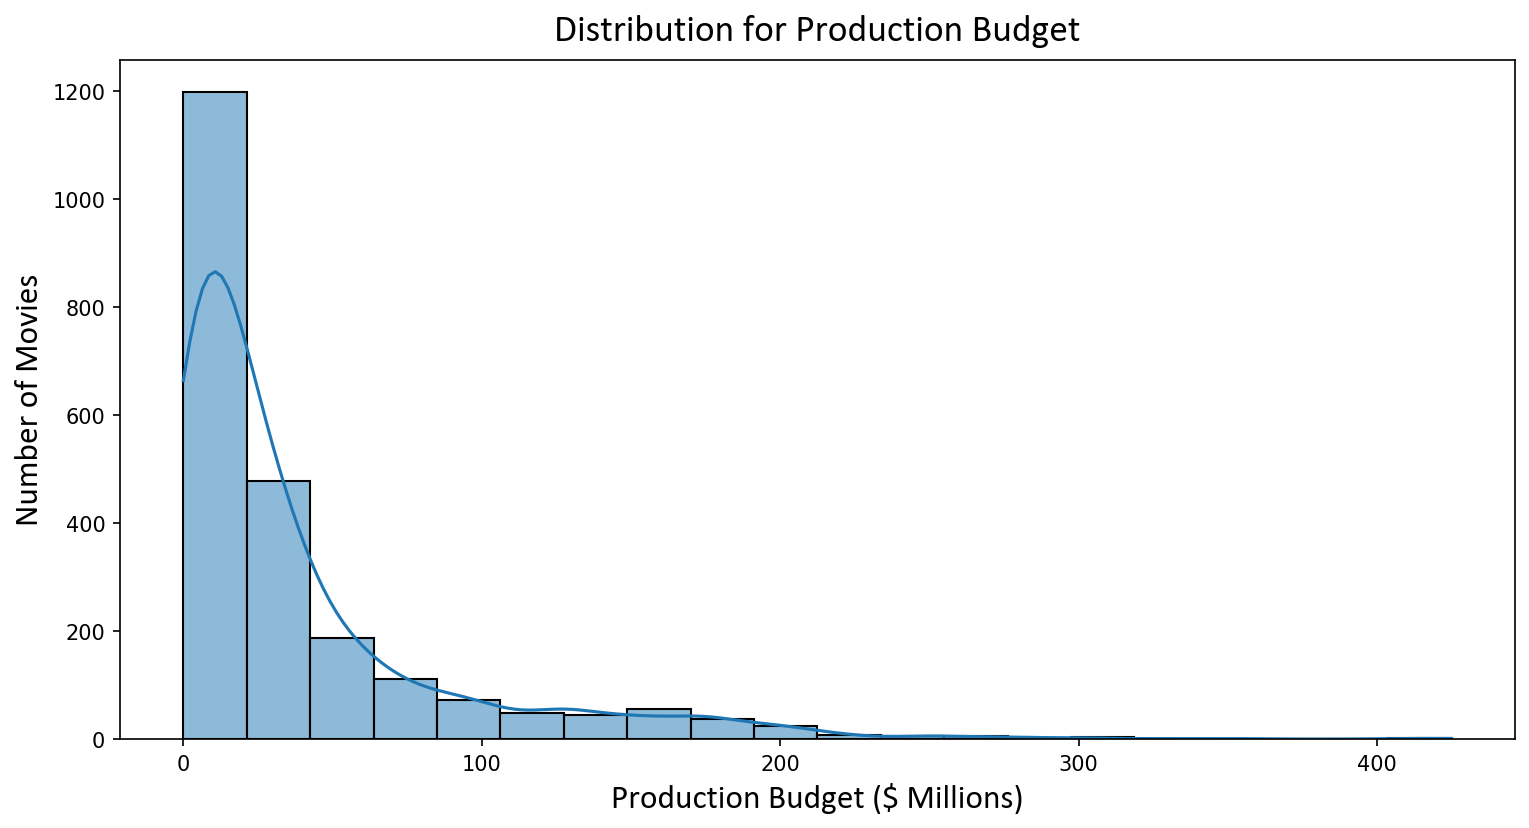

In [22]:
#Visualizing Production Budget using Histogram

fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

sns.histplot(merged_df['production_budget']/1000000, bins = 20, kde = True, ax = ax)
ax.set_title('Distribution for Production Budget', title_font)
ax.set_xlabel('Production Budget ($ Millions)', label_font)
ax.set_ylabel('Number of Movies', label_font)

Text(0, 0.5, 'Number of Movies')

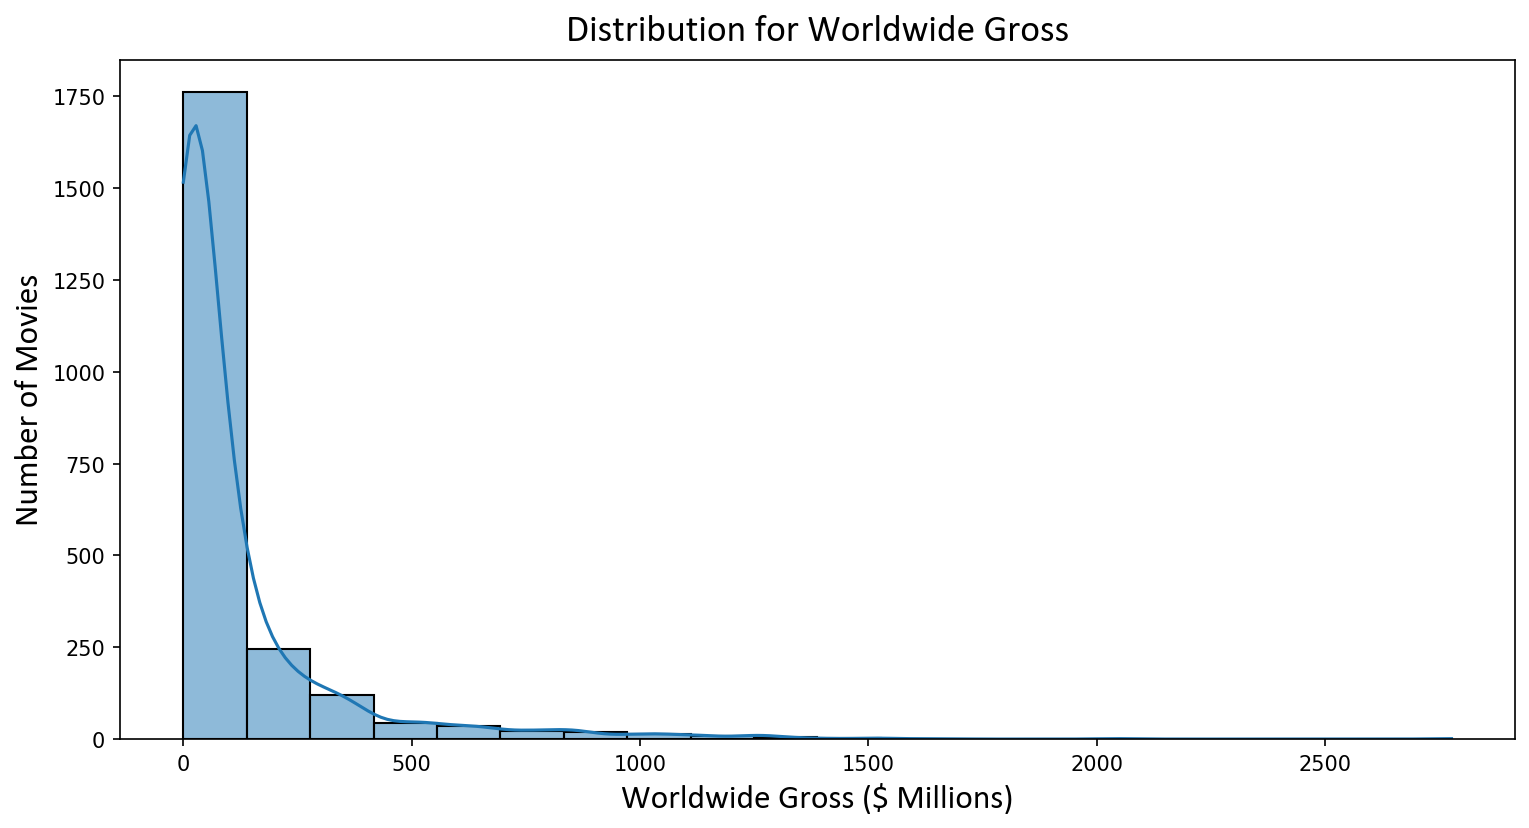

In [23]:
#Visualizing Worldwide Gross using Histogram

fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

sns.histplot(merged_df['worldwide_gross']/1000000, bins = 20, kde = True, ax = ax)
ax.set_title('Distribution for Worldwide Gross', title_font)
ax.set_xlabel('Worldwide Gross ($ Millions)', label_font)
ax.set_ylabel('Number of Movies', label_font)

The distribution of these two variables are both skewed to the right with extremely long tails; this tells us that while the majority of the movies have low budgets (under 50 Million) and low gross (under 100 million), there are some movies with extremely high budget and gross. These could be blockbuster hits, highly anticipated movies or movies from a major production company. Although these "outliers" have a large impact on the data, we decided to keep them in order to capture the effect of these high-budget, high-gross movies in our analysis.

## Actionable Recommendations

#### Highest Rated Movie Genres 

In [24]:
""" Visualizing the top 5 genres compared to all other genres """

title_font = {'fontname':'Calibri', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
label_font = {'fontname':'Calibri', 'size':'16', 'weight':'normal'}

lowest_top_5_rating = grouped_genre_ratings['averagerating'][4]

average_rating = grouped_genre_ratings['averagerating'].mean()

median_rating = grouped_genre_ratings['averagerating'].median()


fig, ax = plt.subplots(figsize = (12, 8), dpi = 150)
cols = ['lightsteelblue' if x < lowest_top_5_rating else 'orangered' for x in grouped_genre_ratings['averagerating']]
sns.barplot(x = grouped_genre_ratings['averagerating'], y = grouped_genre_ratings['genres'], palette = cols, alpha = 0.85, ax = ax, orient ='h')
ax.set_title('Average Ratings by Genre', title_font)
ax.set_xlabel('Genre', label_font, labelpad = 10)
ax.set_ylabel('Average Rating', label_font, labelpad = 20)
ax.axvline(average_rating, c='k', ls='-', lw=2.5)
#ax.axvline(median_rating, c='orange', ls='--', lw=2.5)
plt.tight_layout()

NameError: name 'grouped_genre_ratings' is not defined

In [ ]:
""" Visualizing top 5 genres against themselves """

top_5_genres = grouped_genre_ratings[0:5]

fig, ax = plt.subplots(figsize = (12, 8), dpi = 150)
cols = ['lightsteelblue']
sns.barplot(x = top_5_genres['averagerating'], y = top_5_genres['genres'], palette = cols, alpha = 0.85, ax = ax, orient ='h')
ax.set_title('Average Ratings for Top Five Genres', title_font)
ax.set_xlabel('Genre', label_font, labelpad = 10)
ax.set_ylabel('Average Rating', label_font, labelpad = 20)
ax.axvline(average_rating, c='k', ls='-', lw=2.5)
#ax.axvline(median_rating, c='orange', ls='--', lw=2.5)
plt.tight_layout()

#### Most Profitable Release Month 

In [ ]:
wg_month = (tn_df.groupby(['month'])['worldwide_gross'].mean()/1000000).reset_index()

fig, ax = plt.subplots(figsize = (12, 8), dpi = 150)

cols = ['lightsteelblue' if x < wg_month['worldwide_gross'].max() else 'orangered' for x in wg_month['worldwide_gross']]
sns.barplot(x = wg_month['month'], y = wg_month['worldwide_gross'], palette = cols, alpha = 0.85, ax = ax)
ax.set_title('Worldwide Gross Across the Months', title_font)
ax.set_xlabel('Month', label_font, labelpad = 10)
ax.set_ylabel('Avg Worldwide Gross (Millions $)', label_font, labelpad = 20)
plt.tight_layout()

In [ ]:
profit_month = (tn_df.groupby(['month'])[['profitability']].mean()).reset_index()

fig, ax = plt.subplots(figsize = (12, 8), dpi = 150)

cols = ['lightsteelblue' if x < profit_month['profitability'].max() else 'orangered' for x in profit_month['profitability']]
sns.barplot(x = profit_month['month'], y = profit_month['profitability'], palette = cols, alpha = 0.85, ax = ax)
ax.set_title('Profitability Across the Months', title_font)
ax.set_xlabel('Month', label_font, labelpad = 10)
ax.set_ylabel('Avg Profitability Multiplier', label_font, labelpad = 20)
plt.tight_layout()

#### Budget Interval Per Top 5 Genres

In [ ]:
#code cell to show work and visualizations

### Statistical Communication 

TEXT HERE: Results of Statistical inference 
Interpreation of these results in the context of the problem 

-discussion of confidence interval/results

### Conclusion

TEXT HERE: Summary of conclusions including three relevant findings 